In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import *


In [4]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1]

# z = StandardScaler()
# dataset6[["x","y"]] = z.fit_transform(dataset6)
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

## 1- plot all datasets with standard scaler.

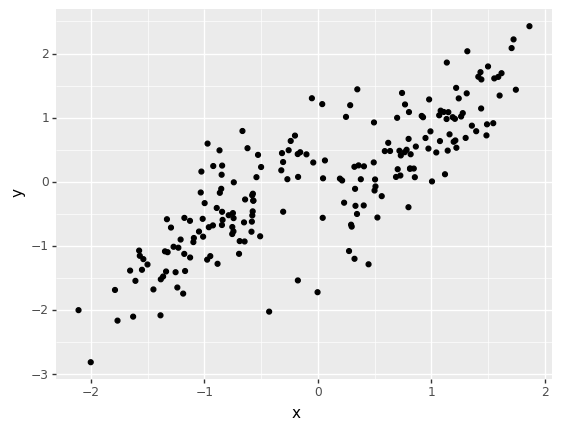

<ggplot: (8733396959857)>

In [5]:
z5 = StandardScaler()
dataset5[["x","y"]] = z5.fit_transform(dataset5)
ggplot(dataset5, aes(x = "x", y = "y")) + geom_point() 

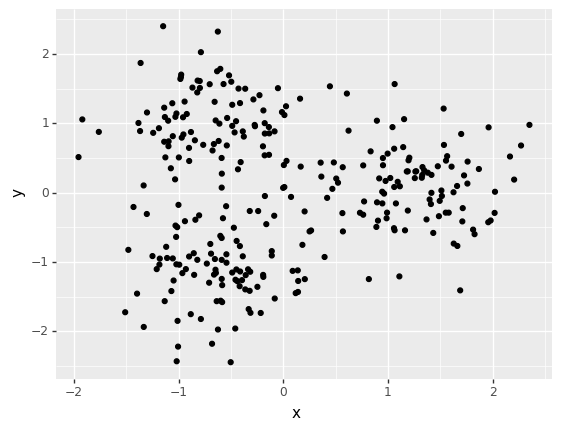

<ggplot: (8733400971813)>

In [6]:
z6 = StandardScaler()
dataset6[["x","y"]] = z6.fit_transform(dataset6)
ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 

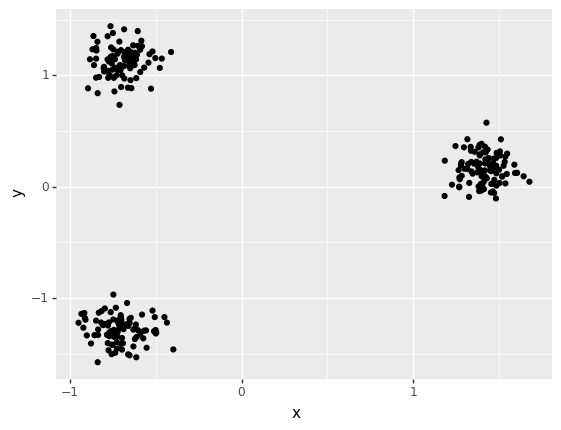

<ggplot: (8733396934305)>

In [7]:
z7 = StandardScaler()
dataset7[["x","y"]] = z7.fit_transform(dataset7)
ggplot(dataset7, aes(x = "x", y = "y")) + geom_point() 

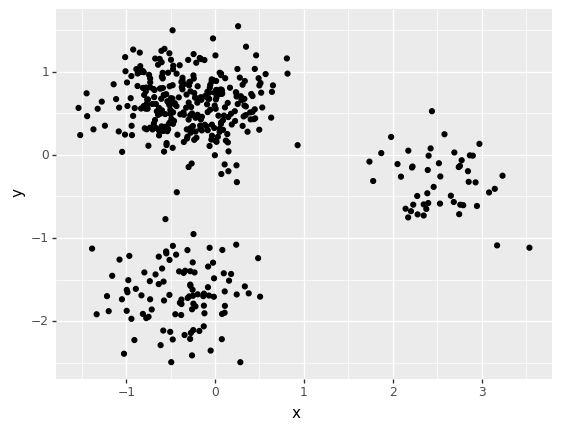

<ggplot: (8733395341837)>

In [8]:
z8 = StandardScaler()
dataset8[["x","y"]] = z8.fit_transform(dataset8)
ggplot(dataset8, aes(x = "x", y = "y")) + geom_point() 

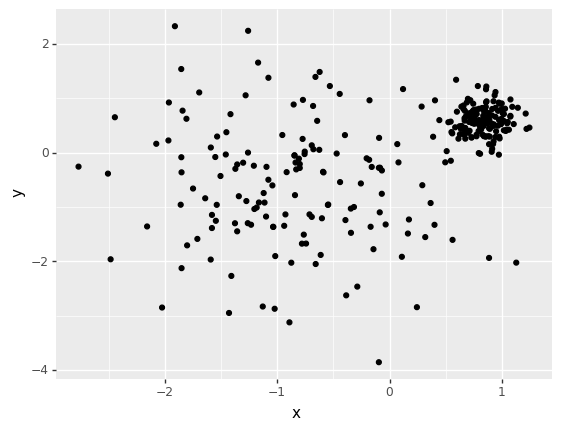

<ggplot: (8733395342009)>

In [9]:
z9 = StandardScaler()
dataset9[["x","y"]] = z9.fit_transform(dataset9)
ggplot(dataset9, aes(x = "x", y = "y")) + geom_point() 

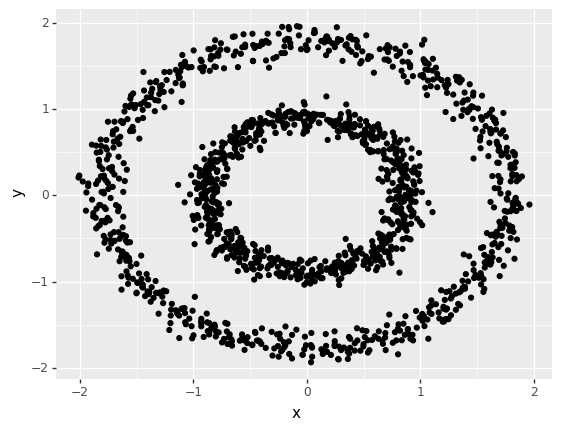

<ggplot: (8733395243873)>

In [10]:
z1 = StandardScaler()
dataset1[["x","y"]] = z1.fit_transform(dataset1)
ggplot(dataset1, aes(x = "x", y = "y")) + geom_point() 

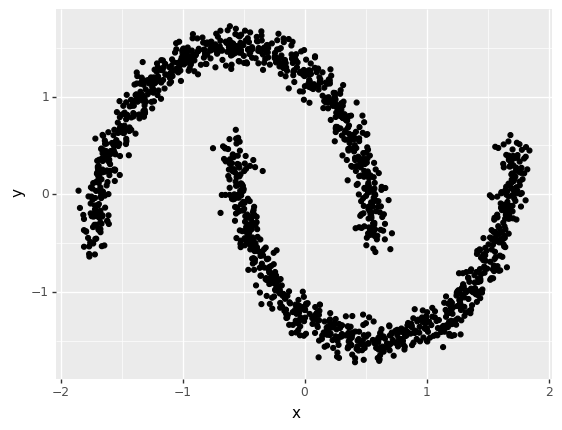

<ggplot: (8733395249353)>

In [11]:
z2 = StandardScaler()
dataset2[["x","y"]] = z2.fit_transform(dataset2)
ggplot(dataset2, aes(x = "x", y = "y")) + geom_point() 

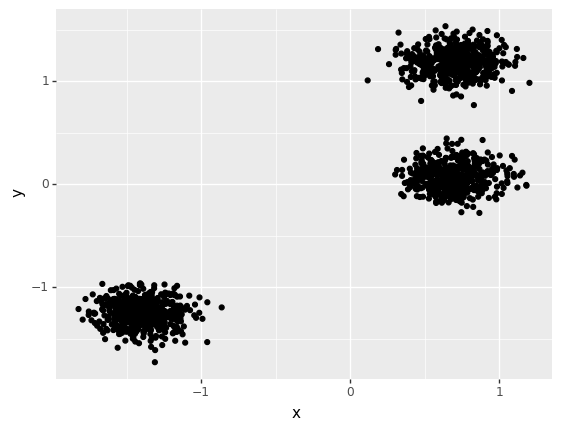

<ggplot: (8733395253873)>

In [12]:
z3 = StandardScaler()
dataset3[["x","y"]] = z3.fit_transform(dataset3)
ggplot(dataset3, aes(x = "x", y = "y")) + geom_point() 

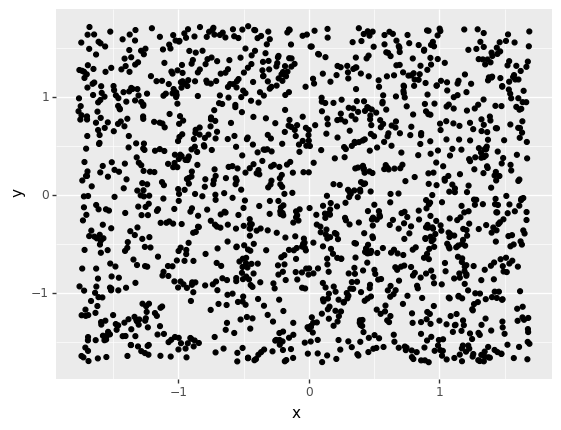

<ggplot: (8733395253893)>

In [13]:
z4 = StandardScaler()
dataset4[["x","y"]] = z4.fit_transform(dataset4)
ggplot(dataset4, aes(x = "x", y = "y")) + geom_point() 

##  use K-means, agglomerative, dbscan with inertia,silhouette score evaluation:

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


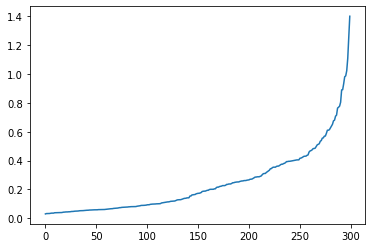

In [15]:
mins = 5
nn = NearestNeighbors(n_neighbors=6)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


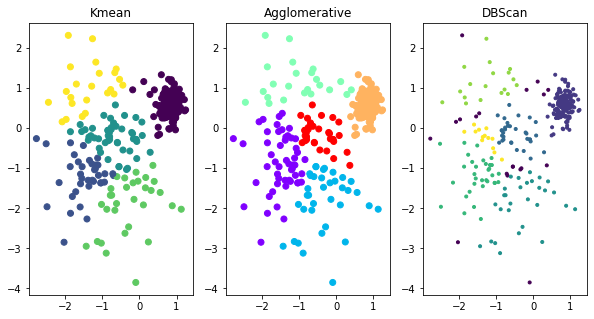

In [114]:
df9 = dataset9[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df9)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df9)
dataset9['label'] = label
ax1.scatter(dataset9['x'],dataset9['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df9)
aglabel9 = cluster.labels_
dataset9['aglabel']=aglabel9
ax2.scatter(dataset9['x'],dataset9['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db9 = DBSCAN(eps=.73, min_samples=5).fit(df9)
# dblabel = db.labels_
# dataset9['dblabel'] = dblabel
X = StandardScaler().fit_transform(df9)
core_samples_mask = np.zeros_like(db9.labels_, dtype=bool)
core_samples_mask[db9.core_sample_indices_] = True
labels9 = db9.labels_
dbscan_clusters = db9.fit_predict(dataset9)
ax3.scatter(dataset9.iloc[:, 0], dataset9.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [115]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset9, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 94.03315363250125 and Silhouette  score is: 0.66027290181462


In [116]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset9, aglabel9)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.6966578044669286


In [117]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset9, labels9)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.37590359681168667


In [ ]:
dataset9.describe()

,x,y,label,hlabel,dblabel,aglabel
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000
mean,-1.704192e-16,1.517305e-17,1.073333,0.896667,-0.006667,2.276667
std,1.001671e+00,1.001671e+00,1.341873,0.688648,0.081513,1.308624
min,-2.766596e+00,-3.849695e+00,0.000000,0.000000,-1.000000,0.000000
25%,-8.377275e-01,-4.482908e-01,0.000000,0.000000,0.000000,1.000000
50%,5.537813e-01,3.565934e-01,0.000000,1.000000,0.000000,3.000000
75%,8.467222e-01,6.547825e-01,2.000000,1.000000,0.000000,3.000000
max,1.243841e+00,2.318717e+00,4.000000,2.000000,0.000000,4.000000


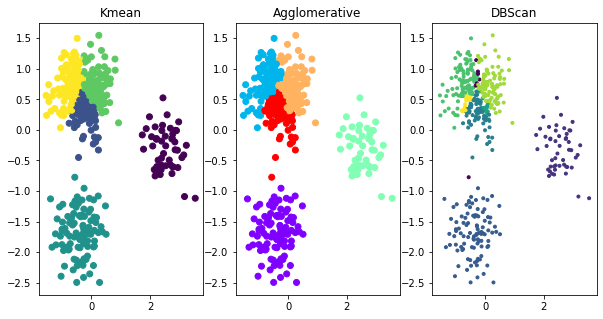

In [107]:
df8 = dataset8[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df8)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df8)
dataset8['label'] = label
ax1.scatter(dataset8['x'],dataset8['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df8)
aglabel8 = cluster.labels_
dataset8['aglabel']=aglabel
ax2.scatter(dataset8['x'],dataset8['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db8 = DBSCAN(eps=.73, min_samples=5).fit(df8)
dbscan_clusters = db8.fit_predict(dataset8)
labels8 = db8.labels_
ax3.scatter(dataset8.iloc[:, 0], dataset8.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [108]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset8, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 82.31735121882556 and Silhouette  score is: 0.6921187973836399


In [109]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset8, aglabel8)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.6840163046374305


In [110]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset8, labels8)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.7370581044077674


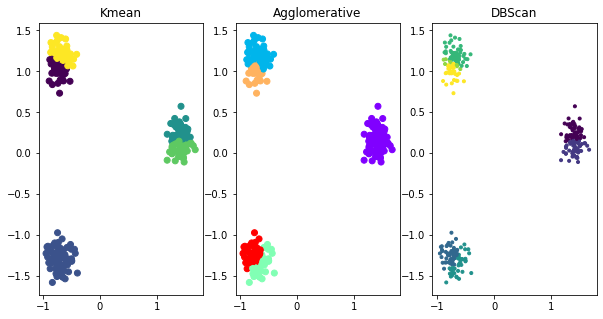

In [103]:
df7 = dataset7[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df7)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df7)
dataset7['label'] = label
ax1.scatter(dataset7['x'],dataset7['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df7)
aglabel7 = cluster.labels_
dataset7['aglabel']=aglabel7
ax2.scatter(dataset7['x'],dataset7['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db7 = DBSCAN(eps=.73, min_samples=5).fit(df7)
dbscan_clusters = db7.fit_predict(dataset7)
labels7 = db7.labels_
ax3.scatter(dataset7.iloc[:, 0], dataset7.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [104]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset7, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 5.596200579997479 and Silhouette  score is: 0.7929622850941072


In [105]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset7, aglabel7)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.8257923603376675


In [106]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset7, labels7)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.8695556440695785


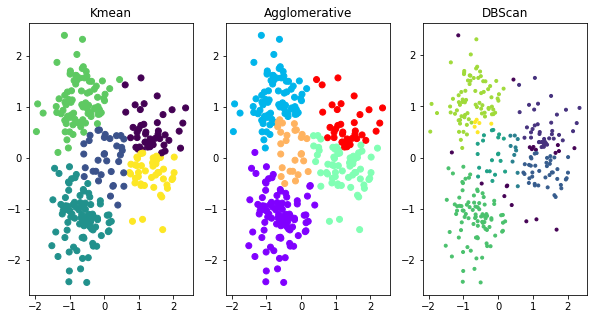

In [101]:
df6 = dataset6[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df6)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df6)
dataset6['label'] = label
ax1.scatter(dataset6['x'],dataset6['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df6)
aglabel6 = cluster.labels_
dataset6['aglabel']=aglabel6
ax2.scatter(dataset6['x'],dataset6['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db6 = DBSCAN(eps=.73, min_samples=5).fit(df6)
dbscan_clusters = db6.fit_predict(dataset6)
labels6 = db6.labels_
ax3.scatter(dataset6.iloc[:, 0], dataset6.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [98]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset6, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 102.76550224702164 and Silhouette  score is: 0.6068839763849403


In [99]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset6, aglabel6)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.5677719622470287


In [102]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset6, labels6)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.5637664107363453


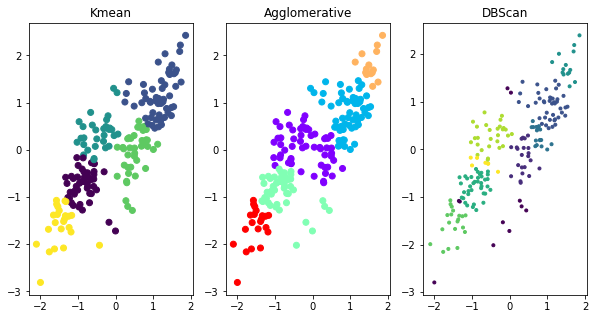

In [93]:
df5 = dataset5[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df5)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df5)
dataset5['label'] = label
ax1.scatter(dataset5['x'],dataset5['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df5)
aglabel5 = cluster.labels_
dataset5['aglabel']=aglabel5
ax2.scatter(dataset5['x'],dataset5['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db5 = DBSCAN(eps=.73, min_samples=5).fit(df5)
dbscan_clusters = db5.fit_predict(dataset5)
labels5 = db5.labels_
ax3.scatter(dataset5.iloc[:, 0], dataset5.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [94]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset5, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 52.78971557681729 and Silhouette  score is: 0.5747464728869491


In [95]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset5, aglabel5)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.5054139444490576


In [96]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset5, labels5)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.6287918585906686


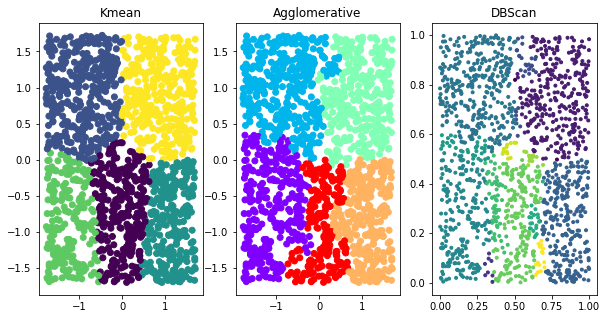

In [89]:
df4 = dataset4[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df4)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df4)
dataset4['label'] = label
ax1.scatter(dataset4['x'],dataset4['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df4)
aglabel4 = cluster.labels_
dataset4['aglabel']=aglabel4
ax2.scatter(dataset4['x'],dataset4['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db4 = DBSCAN(eps=.73, min_samples=5).fit(df4)
dbscan_clusters = db4.fit_predict(dataset4)
labels4 = db4.labels_
ax3.scatter(dataset4.iloc[:, 0], dataset4.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()


In [90]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset4, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 620.2662154449114 and Silhouette  score is: 0.5829960387914752


In [91]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset4, aglabel4)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.5153874712826332


In [92]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset4, labels4)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.4823901581881202


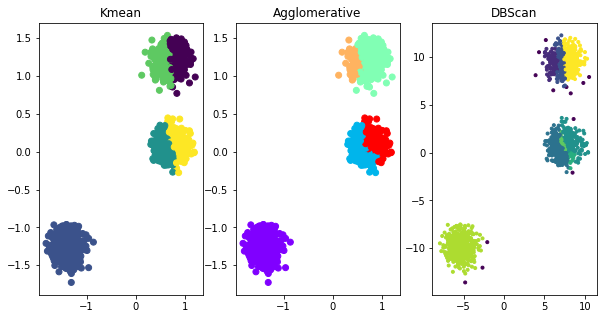

In [85]:
df3 = dataset3[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df3)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df3)
dataset3['label'] = label
ax1.scatter(dataset3['x'],dataset3['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df3)
aglabel3 = cluster.labels_
dataset3['aglabel']=aglabel3
ax2.scatter(dataset3['x'],dataset3['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db3 = DBSCAN(eps=.73, min_samples=5).fit(df3)
dbscan_clusters = db3.fit_predict(dataset3)
labels3 = db3.labels_
ax3.scatter(dataset3.iloc[:, 0], dataset3.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [86]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset3, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 45.93419311712253 and Silhouette  score is: 0.6591486775714964


In [87]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset3, aglabel3)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.5865937783891991


In [88]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset3, labels3)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.628376790117971


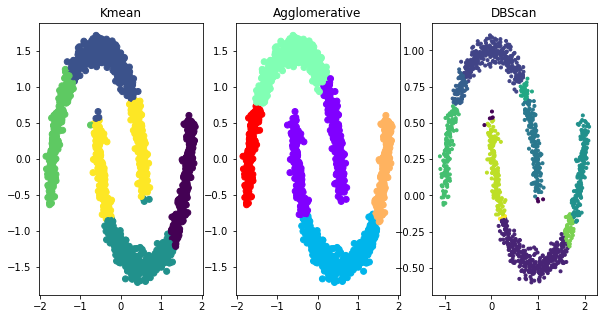

In [80]:
df2 = dataset2[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df2)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df2)
dataset2['label'] = label
ax1.scatter(dataset2['x'],dataset2['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2)
aglabel2 = cluster.labels_
dataset2['aglabel']=aglabel2
ax2.scatter(dataset2['x'],dataset2['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db2 = DBSCAN(eps=.73, min_samples=5).fit(df2)
dbscan_clusters = db2.fit_predict(dataset2)
labels2 = db2.labels_
ax3.scatter(dataset2.iloc[:, 0], dataset2.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [81]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset2, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 447.4632518221292 and Silhouette  score is: 0.6550195943751234


In [82]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset2, aglabel2)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.615311254205693


In [83]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset2, labels2)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.6912706783835424


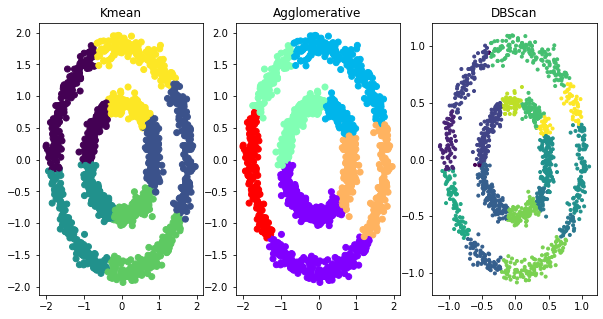

In [76]:
df1 = dataset1[['x','y']]
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df1)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df1)
dataset1['label'] = label
ax1.scatter(dataset1['x'],dataset1['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1)
aglabel1 = cluster.labels_
dataset1['aglabel']=aglabel1
ax2.scatter(dataset1['x'],dataset1['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db1 = DBSCAN(eps=.73, min_samples=5).fit(df1)
dbscan_clusters = db1.fit_predict(dataset1)
labels1 = db1.labels_
ax3.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1],marker=".", c=dbscan_clusters)

plt.show()

In [77]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset1, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 642.1930328914739 and Silhouette  score is: 0.46687934356994854


In [78]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset1, aglabel1)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.48593507055948537


In [79]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset1, labels1)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.5980522218476562
